# Monte Carlo Markov Chain (MCMC)

A lo largo de esta práctica pensaremos que estamos diseñando un juego de mesa en el que tenemos la siguiente configuración de posiciones en el tablero. 

<div style='text-align: center;'>
<img src='./tablero.png' width='700'/>
</div>

El jugador comienza en una de estas posiciones de manera aleatoria con una distribución $$ \pi_0=(\pi_0^{\text{verde}},\pi_0^{\text{amarillo}},\pi_0^{\text{rojo}},\pi_0^{\text{azul}}), \\ \sum \pi_0=1. $$

Cada turno consiste en lo siguiente:
- El jugador recibe una recompensa o un castigo que depende de su posición y está dado por la función $$  R: \text{color} \implies \mathbb{R} $$
- Después el jugador se mueve a una de las 4 posiciones del tablero con una probabilidad dada por la función de transición $$\mathbb{P}\left[ X_n=j|X_{n-1}=i \right]=M_{ij}$$

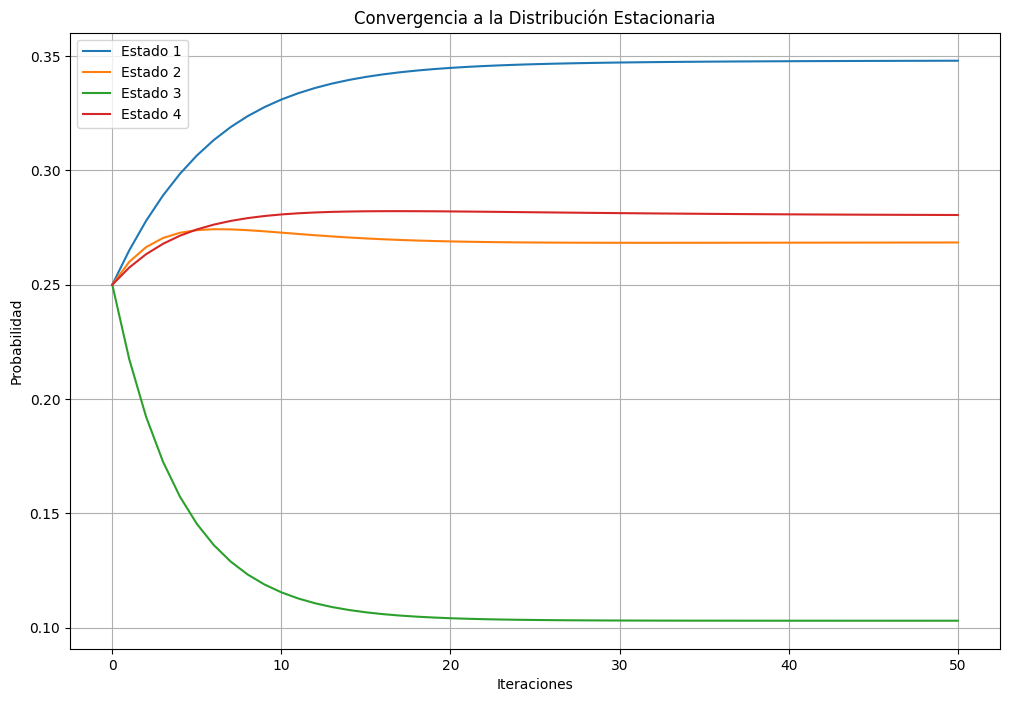

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Matriz de transición (4x4)
transition_matrix = np.array([
    [0.9, 0.07, 0.02, 0.01],
    [0.1, 0.85, 0.03, 0.02],
    [0.05, 0.1, 0.8, 0.05],
    [0.01, 0.02, 0.02, 0.95]
])

# Distribución inicial (4 estados)
initial_distribution = np.array([0.25, 0.25, 0.25, 0.25])

# Listas para guardar la evolución de la distribución y la iteración
distributions = [initial_distribution]
iterations = 50

# Iterar para calcular la distribución en cada paso
for i in range(iterations):
    new_distribution = np.dot(distributions[-1], transition_matrix)
    distributions.append(new_distribution)

# Convertir a un array de NumPy para facilitar el acceso
distributions = np.array(distributions)

# Crear la visualización
plt.figure(figsize=(12, 8))

for i in range(4):
    plt.plot(range(iterations + 1), distributions[:, i], label=f"Estado {i+1}")

plt.title("Convergencia a la Distribución Estacionaria")
plt.xlabel("Iteraciones")
plt.ylabel("Probabilidad")
plt.legend()
plt.grid(True)
plt.show()


# ¿Porqué sé que converge?

Es una cadena irreducible y finita, entonces es una cadena positiva recurrente. Entonces tiene una distribución estacionaria única. 

Dados ciertos premios. Cuál será el valor esperado en n-pasos?
Si la cadena es suficientemente grande. Cada paso va a tener una ganancia esperada de $$ \mathbb{E}\left[ R(X) \right]=R(\text{verde}) \pi(\text{verde})+R(\text{azul}) \pi(\text{azul}) +R(\text{amarillo}) \pi(\text{amarillo})+R(\text{rojo}) \pi(\text{rojo})$$


In [4]:
R_x=np.array([1,2,-50,3])

E_Rx= R_x@distributions[-1,:]
E_Rx

-3.429242461861829

In [5]:
aprox_dist_estac=distributions[-1,:]
aprox_dist_estac

array([0.34793556, 0.26846838, 0.10311138, 0.28048468])

# ¿Cómo harían el juego justo dada esta distribución?



Se pueden poner los primeros tres valores de recompensas arbitrarios y luego resolver. Si $R_1,R_2,R_3$ son conocidos, entonces

$$ 
\begin{align}
\mathbb{E}\left[ R(x) \right]=\sum_i R(i)\pi(i)=0\\
\implies R_4 =-\frac{R_1\pi_1+R_2\pi_2+R_3\pi_3}{\pi_4}
\end{align}
$$


In [6]:
R=np.array([10.0,-50.0,3.0,0])

rec_por_pi=R@aprox_dist_estac
R[-1]=-rec_por_pi/aprox_dist_estac[-1]
R@aprox_dist_estac

0.0

# Aceptación Rechazo

In [7]:
import numpy as np
import scipy.stats as st

xmin,xmax=-2,2
x=np.linspace(xmin,xmax,200)
y=st.norm(0,1).pdf(x)

import plotly.express as px

M=max(y)+0.01


import plotly.graph_objs as go

fig=go.Figure()
traces=[go.Scatter(x=np.ones(100)*xmin,y=np.linspace(0,M,100),mode='lines',marker=dict(color='black')),
        go.Scatter(x=np.ones(100)*xmax,y=np.linspace(0,M,100),mode='lines',marker=dict(color='black')),
        go.Scatter(x=x,y=np.ones(len(x))*M,mode='lines',marker=dict(color='black')),
        go.Scatter(x=x,y=y,mode='lines'),]
[fig.add_trace(trace) for trace in traces]
fig.update_layout(
    title='Aceptación rechazo para la normal truncada',xaxis_title='x', yaxis_title='f(x)',
    height=500, width=500,
    xaxis=dict(range=[xmin-0.1, xmax+0.1]),  showlegend=False
)


fig.show()

In [8]:
# Generamos  N puntos dentro del cuadrado y vemos cuantos aceptamos y rechazamos
N_puntos=1000
p_generados_x=np.random.random(N_puntos)*(xmax-xmin)+xmin
p_generados_y=np.random.random(size=N_puntos)*M

f_evaluando_x=st.norm(0,1).pdf(p_generados_x)
idx_aceptados=p_generados_y<f_evaluando_x
idx_rechazados=p_generados_y>=f_evaluando_x

fig=go.Figure()
traces=[go.Scatter(x=np.ones(100)*xmin,y=np.linspace(0,M,100),mode='lines',marker=dict(color='black')),
        go.Scatter(x=np.ones(100)*xmax,y=np.linspace(0,M,100),mode='lines',marker=dict(color='black')),
        go.Scatter(x=x,y=np.ones(len(x))*M,mode='lines',marker=dict(color='black')),
        go.Scatter(x=x,y=y,mode='lines'),
        go.Scatter(x=p_generados_x[idx_aceptados],y=p_generados_y[idx_aceptados],mode='markers'),
        go.Scatter(x=p_generados_x[idx_rechazados],y=p_generados_y[idx_rechazados],mode='markers')]
[fig.add_trace(trace) for trace in traces]
fig.update_layout(
    title='Aceptación rechazo para la normal truncada',xaxis_title='x', yaxis_title='f(x)',
    height=500, width=500,
    xaxis=dict(range=[xmin-0.1, xmax+0.1]),  showlegend=False
)


In [9]:
import matplotlib.pyplot as plt

fig=px.histogram(p_generados_x[idx_aceptados])
fig.update_layout(
    title='Histograma de puntos aceptados para una Gaussiana',xaxis_title='x', yaxis_title='f(x)',
    height=500, width=500,showlegend=False
)
fig.show()

# Generando de una beta con Metropolis-Hastings

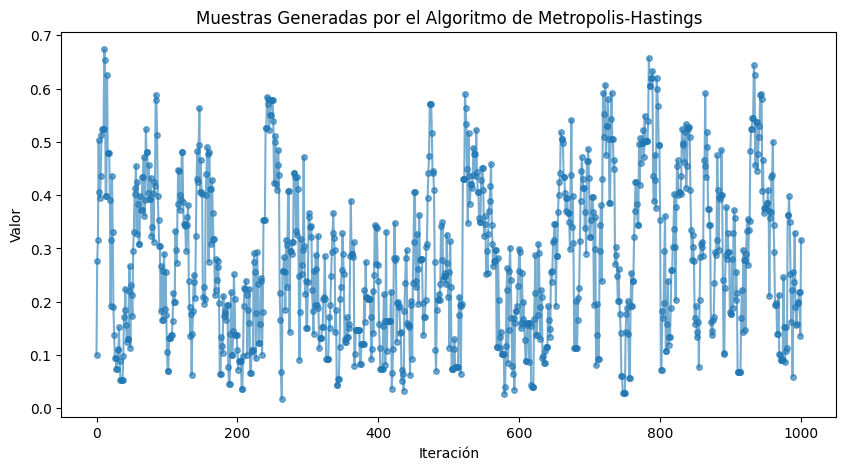

In [10]:
import numpy as np
from scipy.stats import beta, norm

def metropolis_hastings(distribucion_objetivo, distribucion_propuesta, parametros_propuesta, estado_inicial, n_iteraciones):
    """
    Algoritmo de Metropolis-Hastings para generar muestras de una distribución objetivo.

    :param distribucion_objetivo: función de la distribución objetivo que queremos muestrear
    :param distribucion_propuesta: función de la distribución de propuestas para explorar el espacio de estados
    :param parametros_propuesta: parámetros para la distribución de propuestas
    :param estado_inicial: valor inicial de la cadena de Markov
    :param n_iteraciones: número de iteraciones del algoritmo
    :return: muestras generadas por el algoritmo
    """
    muestras = [estado_inicial]
    estado_actual = estado_inicial

    for _ in range(n_iteraciones):
        # Genera una nueva muestra desde la distribución de propuestas
        estado_propuesto = distribucion_propuesta(estado_actual, **parametros_propuesta)
        # Calcula la razón de aceptación (Aceptación de Metropolis)
        razon_aceptacion = min(1, distribucion_objetivo(estado_propuesto) / distribucion_objetivo(estado_actual))
        # Acepta o rechaza la nueva muestra con la probabilidad de la razón de aceptación
        if np.random.rand() < razon_aceptacion:
            estado_actual = estado_propuesto

        muestras.append(estado_actual)

    return muestras

# Definimos nuestra distribución objetivo y de propuestas
def distribucion_objetivo_beta(x):
    # Beta con parámetros alpha=2, beta=5
    return beta.pdf(x, 2, 5)

def distribucion_propuesta_normal(estado_actual, mu, sigma):
    # Normal centrada en el estado actual
    return norm.rvs(loc=estado_actual, scale=sigma)

# Ejemplo de uso de la función metropolis_hastings
np.random.seed(0)  # Semilla para reproducibilidad
muestras_mh = metropolis_hastings(
    distribucion_objetivo=distribucion_objetivo_beta, 
    distribucion_propuesta=distribucion_propuesta_normal, 
    parametros_propuesta={'mu': 0, 'sigma': .1}, 
    estado_inicial=0.1, 
    n_iteraciones=1000
)

# Visualización de las muestras generadas
plt.figure(figsize=(10, 5))
plt.plot(muestras_mh, '-o', markersize=4, alpha=0.6)
plt.title('Muestras Generadas por el Algoritmo de Metropolis-Hastings')
plt.xlabel('Iteración')
plt.ylabel('Valor')
plt.show()


C:\Users\fer_a\AppData\Local\Temp\ipykernel_18884\2147051799.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




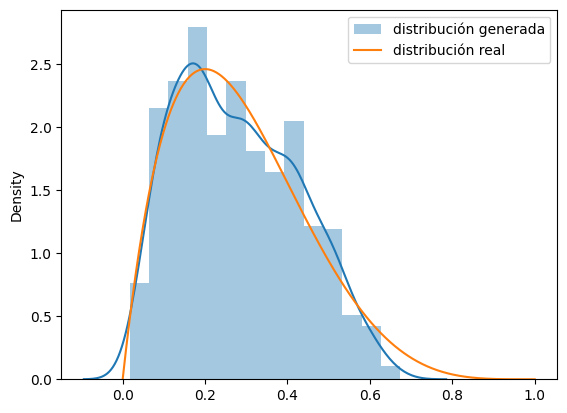

In [11]:
import plotly.express as px
import seaborn as sns

sns.distplot(muestras_mh[:],label='distribución generada');
plt.plot(np.linspace(0,1,1000),distribucion_objetivo_beta(np.linspace(0,1,1000)),label='distribución real');
plt.legend();

# Ejemplo del juego de mesa


<div style='text-align: center;'>
<img src='./tablero.png' width='700'/>
</div>

Definimos la distribución con la que exploraremos

$$ 
g(x\rightarrow y)=1/4
$$

noten que esta función es simétrica en $x,y$

La probabilidad de aceptación está dada por

$$ A(x\rightarrow y)=\min\left( 1, \frac{\pi(y)}{\pi(x)} \frac{g(x \rightarrow y)}{g(y\rightarrow x)} \right) =\min\left( 1, \frac{\pi(y)}{\pi(x)} \right)  $$

entonces dado que ya tenemos la distribución estacionaria $\pi$ dada una función de recompensa $R$ ($\pi$ es tal que hace el juego justo). Podemos calcular la probabilidad de transición como 

$$ P(x,y)= g(x\rightarrow y) A(x \rightarrow y) $$

Usando los valores anteriores tenemos

In [12]:
def g(x,y):
    return 1/4

def A(x,y,pi):
    return min(1,pi[x]/pi[y])

pi=aprox_dist_estac
pi

array([0.34793556, 0.26846838, 0.10311138, 0.28048468])

Así obtenemos la función de transición de nuestra matriz

In [13]:
P=np.zeros(shape=(4,4))
for i in range(4):
    for j in range(4):
        P[i,j]=A(i,j,pi)*g(i,j)

P

array([[0.25      , 0.25      , 0.25      , 0.25      ],
       [0.19290094, 0.25      , 0.25      , 0.23928971],
       [0.07408798, 0.09601817, 0.25      , 0.09190464],
       [0.20153493, 0.25      , 0.25      , 0.25      ]])

In [2]:
import numpy as np

np.array([[0.25      , 0.19290094, 0.07408798, 0.20153493],
       [0.25      , 0.25      , 0.09601817, 0.25      ],
       [0.25      , 0.25      , 0.25      , 0.25      ],
       [0.25      , 0.23928971, 0.09190464, 0.25      ]]).sum(axis=1)

array([0.71852385, 0.84601817, 1.        , 0.83119435])